# Compute performance metrics for the given Y and Y_score without sklearn

In [119]:
import numpy as np
import pandas as pd
from tqdm import tqdm
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

#### Task-1:Compute Confusion Matrix 

In [61]:
df_a=pd.read_csv('C:\\Users\\pavan\\OneDrive\\Desktop\\AppliedAI\\AppliedML\\Assignments\\solving_assignments\\7_Compute-Performance-metrics-without-Sklearn/5_a.csv')
df_a.head

<bound method NDFrame.head of          y     proba
0      1.0  0.637387
1      1.0  0.635165
2      1.0  0.766586
3      1.0  0.724564
4      1.0  0.889199
...    ...       ...
10095  1.0  0.665371
10096  1.0  0.607961
10097  1.0  0.777724
10098  1.0  0.846036
10099  1.0  0.679507

[10100 rows x 2 columns]>

In [94]:
# write your code here for task A
true_classes = df_a["y"]
predicted_classes = df_a["proba"]

classes = set(true_classes)
classes = [int(i) for i in classes]
number_of_classes = len(classes)


y_proba = list(predicted_classes)
y_pred = []
for i in range(len(y_proba)):
    if y_proba[i] < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)
        

predicted_classes_ = y_pred


def conf_matrix(true_classes,predicted_classes_,number_of_classes,classes):
    #creating empty(dummy) confusion matrix filled with zero values
    cal_conf_matrix = pd.DataFrame(
        np.zeros((number_of_classes, number_of_classes),dtype=int),
        index=classes,
        columns=classes)
    #print("conf_matrix:\n",conf_matrix)



    for true_label, prediction in zip(true_classes ,predicted_classes_):
        # Each pair of (true_label, prediction) is a position in the confusion matrix (row, column)
        # Basically here we are counting how many times we have each pair.
        # The counting will be placed at the matrix index (true_label/row, prediction/column)

        cal_conf_matrix.loc[true_label, prediction] += 1
    return cal_conf_matrix
res = conf_matrix(true_classes,predicted_classes_,number_of_classes,classes)

print('Confusion Matrix of given dataset:\n', res.values)

Confusion Matrix of given dataset:
 [[    0   100]
 [    0 10000]]


By using sklearn implementation

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes, predicted_classes_)

array([[    0,   100],
       [    0, 10000]], dtype=int64)

#### Task-2:Compute F1 Score 

In [96]:
from sklearn.metrics import f1_score
f1_score(true_classes, predicted_classes_)

0.9950248756218906

Method-1

In [97]:
#calculating precision: TP/(TP+FP)
conf_matrix = res
pre = conf_matrix.loc[1,1]/(conf_matrix.loc[1,1]+conf_matrix.loc[0,1])

#calculating recall: TP/(TP+FN)
re = conf_matrix.loc[1,1]/(conf_matrix.loc[1,1]+conf_matrix.loc[1,0])
#re = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])

f1 = 2*pre*re/(pre+re)

print('F1 score:',f1)

F1 score: 0.9950248756218906


Alternative method:

In [98]:
def f1(actual, predicted, label):
    tp_lst = []
    fp_lst = []
    fn_lst = []
    tp_ = []
    fp_ = []
    fn_ = []
    
    """ A helper function to calculate f1-score for the given `label` """
    for i in label:
        for j in range(len(actual)):
    # F1 = 2 * (precision * recall) / (precision + recall)
            tp_.append(np.sum((actual[j]==label[i]) & (predicted[j]==label[i])))
            fp_.append(np.sum((actual[j]!=label[i]) & (predicted[j]==label[i])))
            fn_.append(np.sum((predicted[j]!=label[i]) & (actual[j]==label[i])))
        
    #tp_lst.append(tp_)
    #fp_lst.append(fp_)
    #fn_lst.append(fn_)
    #print(fn_lst)
    tp,fp,fn = sum(tp_), sum(fp_), sum(fn_)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1
f1(true_classes,predicted_classes_,classes)

0.9900990099009901

But getting error in the value ??? Please comment on it

#### Task-3:Compute AUC Score

In [99]:
def comp_single_tpr_fpr(df):
    tp = ((df['y']==1.0) & (df['y_pred']==1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_pred'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_pred'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_pred'] == 0)).sum()    
    
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    
    return [tpr, fpr]


def cal_all_thold_tpr_fpr(df_a):
    
    tpr_all_tholds = []
    fpr_all_tholds = []
    
    sorted_df = df_a.sort_values(by=['proba'], ascending = False)
    unique_proba_tholds = sorted_df['proba'].unique()
    
    for tholds in tqdm(unique_proba_tholds):
        sorted_df['y_pred'] = np.where(sorted_df['proba']<tholds,0,1)
        #print(sorted_df['y_pred'])
        tpr_fpr_arr = comp_single_tpr_fpr(sorted_df)
        tpr_all_tholds.append(tpr_fpr_arr[0])
        fpr_all_tholds.append(tpr_fpr_arr[1])
        
    return tpr_all_tholds, fpr_all_tholds

from tqdm import tqdm
all_tpr_val, all_fpr_val = cal_all_thold_tpr_fpr(df_a)
auc_score = np.trapz(all_tpr_val,all_fpr_val )
print('ROC-AUC score for given dataset:',auc_score )

100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [00:14<00:00, 710.70it/s]


ROC-AUC score for given dataset: 0.48829900000000004


In [100]:
# Checking result with scikit-learn
from sklearn.metrics import roc_auc_score
sklearn_roc_auc_score = roc_auc_score(true_classes, predicted_classes)
print('sk-learn roc_auc_score: ', sklearn_roc_auc_score)

sk-learn roc_auc_score:  0.48829900000000004


Text(0.5, 1.0, 'AUC=0.4883')

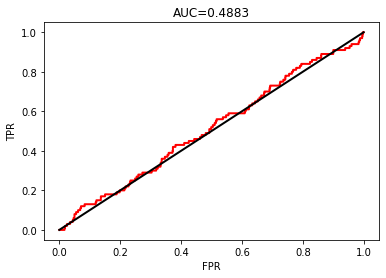

In [101]:
# Plotting of ROC-AUC Curve
import matplotlib.pyplot as plt
plt.plot(all_tpr_val, all_fpr_val, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score, 4)))

#### Task-4:Compute Accuracy Score 

using sklearn

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(true_classes, predicted_classes_)


0.9900990099009901

using custom implementation

In [103]:
def accuracy(conf_matrix, classes):
    num = []
    den = []

    for i in range(len(classes)):
        num.append(conf_matrix.loc[i,i])
        for j in range(len(classes)):
            den.append(conf_matrix.loc[i,j])
    num_sum = sum(num)
    den_sum = sum(den)

    return num_sum, den_sum

num_sum, den_sum = accuracy(conf_matrix,classes)

acc = num_sum/den_sum

print('Accuracy for given dataset:',acc)

Accuracy for given dataset: 0.9900990099009901




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

### Task-1:Compute Confusion Matrix

In [104]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [105]:
# write your code here for task B
true_classes = df_b["y"]
predicted_classes = df_b["proba"]

classes = set(true_classes)
classes = [int(i) for i in classes]
number_of_classes = len(classes)


y_proba = list(predicted_classes)
y_pred = []
for i in range(len(y_proba)):
    if y_proba[i] < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)
        

predicted_classes_ = y_pred

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes, predicted_classes_)

array([[9761,  239],
       [  45,   55]], dtype=int64)

In [107]:
# write your code here for task B
def conf_matrix(true_classes,predicted_classes_,number_of_classes,classes):
    #creating empty(dummy) confusion matrix filled with zero values
    conf_matrix = pd.DataFrame(
        np.zeros((number_of_classes, number_of_classes),dtype=int),
        index=classes,
        columns=classes)
    #print("conf_matrix:\n",conf_matrix)



    for true_label, prediction in zip(true_classes ,predicted_classes_):
        # Each pair of (true_label, prediction) is a position in the confusion matrix (row, column)
        # Basically here we are counting how many times we have each pair.
        # The counting will be placed at the matrix index (true_label/row, prediction/column)

        conf_matrix.loc[true_label, prediction] += 1
    return conf_matrix
conf_matrix = conf_matrix(true_classes,predicted_classes_,number_of_classes,classes)

print('Confusion Matrix of given dataset:\n', conf_matrix.values)

Confusion Matrix of given dataset:
 [[9761  239]
 [  45   55]]


#### Task-2:Compute F1 Score 

In [108]:
from sklearn.metrics import f1_score
res_f1 = f1_score(true_classes, predicted_classes_)
print('F1 score for given dataset:',res_f1)

F1 score for given dataset: 0.2791878172588833


Method-1

In [109]:
#calculating precision: TP/(TP+FP)
#conf_matrix = res
pre = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])

#calculating recall: TP/(TP+FN)
re = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])

f1 = 2*pre*re/(pre+re)

print('F1 score:',f1)


F1 score: 0.2791878172588833


Alternative method

In [110]:
def f1(actual, predicted, label):
    tp_lst = []
    fp_lst = []
    fn_lst = []
    tp_ = []
    fp_ = []
    fn_ = []
    
    """ A helper function to calculate f1-score for the given `label` """
    for i in label:
        for j in range(len(actual)):
    # F1 = 2 * (precision * recall) / (precision + recall)
            tp_.append(np.sum((actual[j]==label[i]) & (predicted[j]==label[i])))
            fp_.append(np.sum((actual[j]!=label[i]) & (predicted[j]==label[i])))
            fn_.append(np.sum((predicted[j]!=label[i]) & (actual[j]==label[i])))
        
    #tp_lst.append(tp_)
    #fp_lst.append(fp_)
    #fn_lst.append(fn_)
    #print(fn_lst)
    tp,fp,fn = sum(tp_), sum(fp_), sum(fn_)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

print('F1score for given dataset:',f1(true_classes,predicted_classes_,classes))

F1score for given dataset: 0.9718811881188119



<p style="color:red;">ERROR: Why I am getting error in the value by using above (custom) code ??? Please comment  on it  ???</p>

#### Task-3: Compute AUC score

In [111]:
from tqdm import tqdm
all_tpr_val, all_fpr_val = cal_all_thold_tpr_fpr(df_b)
auc_score = np.trapz(all_tpr_val,all_fpr_val )
print('ROC-AUC score for given dataset:',auc_score )

100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [00:14<00:00, 720.76it/s]

ROC-AUC score for given dataset: 0.9377570000000001


In [112]:
# Checking result with scikit-learn
from sklearn.metrics import roc_auc_score
sklearn_roc_auc_score = roc_auc_score(true_classes, predicted_classes)
print('sk-learn roc_auc_score: ', sklearn_roc_auc_score)

sk-learn roc_auc_score:  0.9377570000000001


Text(0.5, 1.0, 'AUC=0.9378')

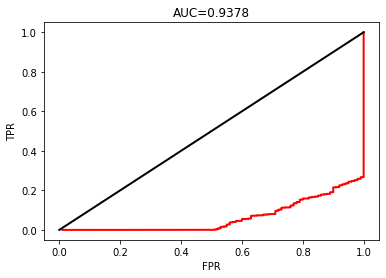

In [113]:
# Plotting of ROC-AUC Curve
import matplotlib.pyplot as plt
plt.plot(all_tpr_val, all_fpr_val, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score, 4)))

##### Task-4: Compute Accuracy Score 

using sklearn

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(true_classes, predicted_classes_)

0.9718811881188119

using custom implementation

In [115]:
def accuracy(conf_matrix, classes):
    num = []
    den = []

    for i in range(len(classes)):
        num.append(conf_matrix.loc[i,i])
        for j in range(len(classes)):
            den.append(conf_matrix.loc[i,j])
    num_sum = sum(num)
    den_sum = sum(den)

    return num_sum, den_sum

num_sum, den_sum = accuracy(conf_matrix,classes)

acc = num_sum/den_sum

print('Accuracy for given dataset:',acc)

Accuracy for given dataset: 0.9718811881188119


##### reference: https://www.kaggle.com/code/paulrohan2020/performance-metrics-without-sklearn/notebook

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [116]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [117]:
df_c.shape

(2852, 2)

In [120]:
 # write your code for task C
    
true_classes_c = df_c["y"]
predicted_classes_c = df_c["prob"]
unique_prob_pred_classes_c = np.unique(df_c)

def comp_A_metric(y_true, y_pred, thold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
   
    for i in tqdm(range(len(y_pred))):
        if y_pred[i] >= thold:
            if y_true[i]==1:
                tp+=1
            else:
                fp+=1
        if y_pred[i] < thold:
            if y_true[i]==0:    
                tn+=1
            else:
                fn+=1
    A = (500*fn)+(100*fp)
    
    return A

def comp_min_A(y_true, y_pred, thold_arr):
    min_A = float('inf')
    min_thold = 0
    
    for thold in tqdm(thold_arr):
        A = comp_A_metric(y_true, y_pred, thold)
        if A <= min_A:
            min_A = min(A,min_A)
            min_t = thold
    return min_A, min_t

res_c = comp_min_A(true_classes_c,predicted_classes_c,unique_prob_pred_classes_c)
print('best threshold of probability of metric A for the given data:\n',res_c)



100%|██████████████████████████████████████████████████████████████████████████| 2852/2852 [00:00<00:00, 109506.44it/s]

100%|██████████████████████████████████████████████████████████████████████████| 2852/2852 [00:00<00:00, 101861.92it/s]

100%|██████████████████████████████████████████████████████████████████████████| 2852/2852 [00:00<00:00, 109708.31it/s]

100%|███████████████████████████████████████████████████████████████████████████| 2852/2852 [00:00<00:00, 91900.64it/s]

100%|██████████████████████████████████████████████████████████████████████████| 2852/2852 [00:00<00:00, 109575.65it/s]

100%|███████████████████████████████████████████████████████████████████████████| 2852/2852 [00:00<00:00, 91893.58it/s]

100%|██████████████████████████████████████████████████████████████████████████| 2852/2852 [00:00<00:00, 101693.93it/s]

100%|███████████████████████████████████████████████████████████████████████████| 2852/2852 [00:00<00:00, 94992.02it/s]

100%|███████████████████████████

best threshold of probability of metric A for the given data:
 (141000, 0.2300390278970873)



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

#### Task-1:Compute Mean Square Error 

In [121]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [122]:
df_d.shape


(157200, 2)

In [123]:
 # write your code for task 5d
    
true_classes_d = df_d["y"]
predicted_classes_d = df_d["pred"]
def comp_mse(y_true,y_pred):
    sum_ = []
    for i in range(len(y_true)):
        sum_.append((y_true[i]-y_pred[i])**2)

    res = sum(sum_)/(len(y_true))
    return res


print('Mean Square Error for given dataset (5_d.csv):',comp_mse(true_classes_d,predicted_classes_d ))

Mean Square Error for given dataset (5_d.csv): 177.16569974554707


In [124]:
#alternative method
true_classes_d_ = df_d.iloc[:,0].values
predicted_classes_d_ = df_d.iloc[:,1].values
def comp_m_s_e(y_true,y_pred):
    mse = np.mean((y_true-y_pred)**2)
    return mse
comp_m_s_e(true_classes_d,predicted_classes_d )

177.16569974554707

In [125]:
# Checking result with scikit-learn
from sklearn.metrics import mean_squared_error
mean_squared_error(true_classes_d, predicted_classes_d)

177.16569974554707

#### Task-2: Compute MAPE (Mean absolute percentage error)

In [126]:
def comp_MAPE(y_true,y_pred):
    mape = np.mean(np.abs(y_true-y_pred))/np.mean(y_true) * 100
    return mape

print('MAPE value:', comp_MAPE(true_classes_d,predicted_classes_d))

MAPE value: 12.91202994009687


In [127]:
#alternative method
def comp_MAPE(y_true,y_pred):
    m = np.sum(np.abs(y_true-y_pred))/np.sum(y_true) * 100
    return m

print('MAPE value:', comp_MAPE(true_classes_d,predicted_classes_d))


MAPE value: 12.91202994009687


In [128]:
# Checking result with scikit-learn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(true_classes_d, predicted_classes_d)

383407594230912.0

<p style="color:red;">ERROR: Why I am getting different value of MAPE, which is higher value from sklearn; Could you provde correct function to use here from sklearn  ???</p>

#### Task-3:  Compute R^2 error

In [129]:
# Coefficient of determination also called as  R2  score
def comp_R_2(y_true,y_pred):
    mean_y_true = np.mean(y_true)
    #mean_y_true = (y_true).mean()
    
    ss_res = np.sum((y_true-y_pred)**2)
    #ss_res = ((y_true-y_pred)**2).sum()
    
    ss_tot = np.sum((y_true-mean_y_true)**2)
    #ss_tot = ((y_true-mean_y_true)**2).sum()
    r_2 = 1 - (ss_res/ss_tot)
    
    return r_2

print('R_2 error:',comp_R_2(true_classes_d, predicted_classes_d))

R_2 error: 0.9563582786990937


In [130]:
# Checking the r-square metric with sklearn
from sklearn.metrics import r2_score
r2_score(true_classes_d, predicted_classes_d)

0.9563582786990937

The following website helps a few of tasks  (like Task - 3 and Task 1c,2c)
https://www.kaggle.com/code/paulrohan2020/performance-metrics-without-sklearn